In [4]:
pwd

'/mmfs1/data/bergerar/BC-MRI-ADHD/Code'

In [22]:
import ants
import os 
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [128]:
df = pd.read_csv('../Data/df_all2.csv')
df

,Unnamed: 0,Unnamed: 0.1,Subject,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,...,Full4 IQ,Med Status,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2,ID,subID
0,0,0,0,26001.0,2,1.0,16.92,1,pending,pending,...,120.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0026001
1,1,1,1,26002.0,2,1.0,15.68,1,pending,pending,...,107.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0026002
2,2,2,2,26004.0,2,0.0,14.99,1,pending,pending,...,125.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0026004
3,3,3,3,26005.0,2,0.0,15.16,1,pending,pending,...,126.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0026005
4,4,4,4,26009.0,2,1.0,16.91,0,pending,pending,...,97.0,pending,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0026009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,712,712,712,16015.0,7,1.0,11.70,1,0,NaN,...,108.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016015
713,713,713,713,16035.0,7,1.0,13.94,1,0,NaN,...,113.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016035
714,714,714,714,16023.0,7,0.0,12.51,0,0,NaN,...,107.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016023
715,715,715,715,16054.0,7,1.0,16.05,1,0,NaN,...,105.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016054


In [129]:
brain_dir = '../../Extracted_Brains/'
files = [f for f in os.listdir(brain_dir) if f.endswith('.nii.gz')]
files.sort()
print(len(files))
files[0:5]

596


['sub-0010001_Extracted_Brain.nii.gz',
 'sub-0010002_Extracted_Brain.nii.gz',
 'sub-0010003_Extracted_Brain.nii.gz',
 'sub-0010004_Extracted_Brain.nii.gz',
 'sub-0010005_Extracted_Brain.nii.gz']

In [134]:
fn_temp = '../../Extracted_Brains/{sub}_Extracted_Brain.nii.gz'

In [143]:
df['has_brain'] = [os.path.exists(fn_temp.format(sub=val)) for val in df['subID'].values]

In [176]:
#df.iloc[np.isnan(pd.to_numeric(brain_df['DX'],errors='coerce').values)]

In [183]:
brain_df = df.iloc[df['has_brain'].values]
brain_df = brain_df.iloc[brain_df['DX'].values!='pending']
brain_df['DX'] = pd.to_numeric(brain_df['DX'])
brain_df.to_csv('../Data/brain_df_S466.csv')
brain_df

,Unnamed: 0,Unnamed: 0.1,Subject,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,...,Med Status,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2,ID,subID,has_brain
26,26,26,26,2371032.0,3,0.0,10.73,1,0,NaN,...,1,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-2371032,True
27,27,27,27,2026113.0,3,0.0,12.99,1,1,NaN,...,1,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-2026113,True
28,28,28,28,3434578.0,3,0.0,8.12,1,0,NaN,...,1,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-3434578,True
29,29,29,29,8628223.0,3,0.0,10.81,1,0,Simple phobia,...,1,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-8628223,True
30,30,30,30,1623716.0,3,0.0,12.65,1,1,NaN,...,1,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-1623716,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,707,707,707,16081.0,7,1.0,18.81,1,0,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016081,True
709,709,709,709,16003.0,7,1.0,10.46,1,0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,sub-0016003,True
711,711,711,711,16057.0,7,0.0,16.74,1,0,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016057,True
714,714,714,714,16023.0,7,0.0,12.51,0,0,NaN,...,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,sub-0016023,True


In [ ]:
def norm(mat):
    return (mat - mat.min()) / (mat.max()-mat.min())

In [241]:
%%time
im_arr = [ants.image_read(fn_temp.format(sub=val)).numpy() for val in brain_df['subID'].values]
im_arr = np.array(im_arr)
im_arr = np.array([norm(im_arr[i,:,:,:]) for i in range(im_arr.shape[0])])
im_arr.shape

CPU times: user 2.96 s, sys: 1.06 s, total: 4.03 s
Wall time: 6.42 s


(440, 64, 64, 64)

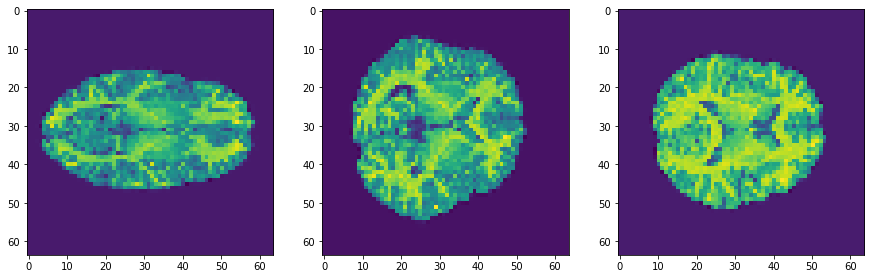

In [242]:
#im_arr = im_arr.astype('float16')
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im_arr[0,:,:,32])

plt.subplot(1,3,2)
plt.imshow(im_arr[233,:,:,32])

plt.subplot(1,3,3)
plt.imshow(im_arr[-1,:,:,32])

In [243]:
controls = brain_df['DX'].values==0
patients = brain_df['DX'].values!=0

In [244]:
np.savez_compressed(file='../Assets/brain_array-440.npz',data=im_arr,controls=controls,patients=patients)

In [245]:
list(np.load('../Assets/brain_array-440.npz').keys())

['data', 'controls', 'patients']

In [117]:
# def pad_subID(val):
#     if np.isnan(val):
#         val_str = val
#     else:
#         val_str = str(int(val))
#         if len(val_str)==5:
#             val_str = 'sub-00'+val_str
            
#         if len(val_str)==7:
#             val_str = 'sub-'+val_str

#     return val_str

# df['subID'] = [pad_subID(val) for val in df['ScanDir ID'].values]
# df.to_csv('../Data/df_all2.csv')